### **Importing Libraries and Dataset**

In [191]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

In [192]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [193]:
data.describe()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


### **Data Preprocessing and Visualization**

In [194]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [195]:
print(obj)

Loan_ID               True
Gender                True
Married               True
Dependents           False
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool


As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it

In [196]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.

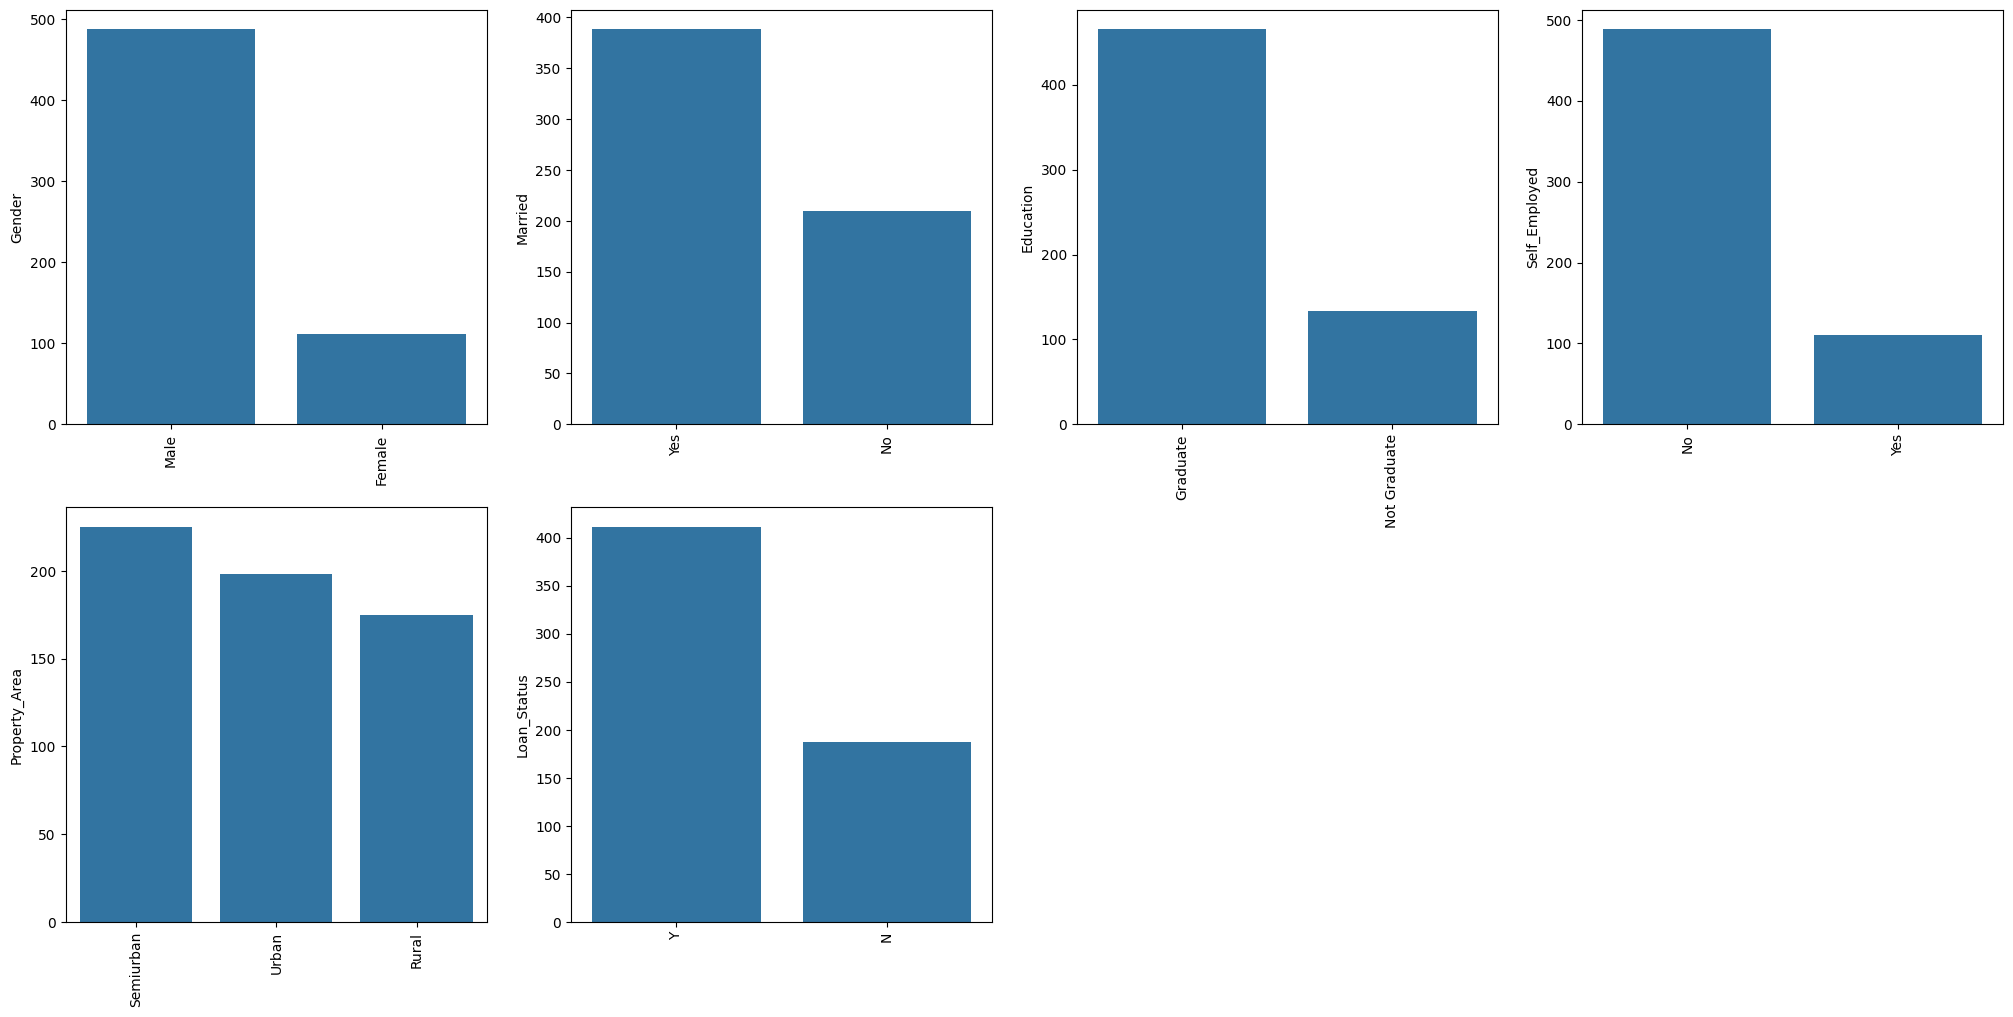

In [197]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(25,70))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  plt.ylabel(col)
  sns.barplot(x=list(y.index), y=y)
  index +=1


As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [198]:
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [199]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

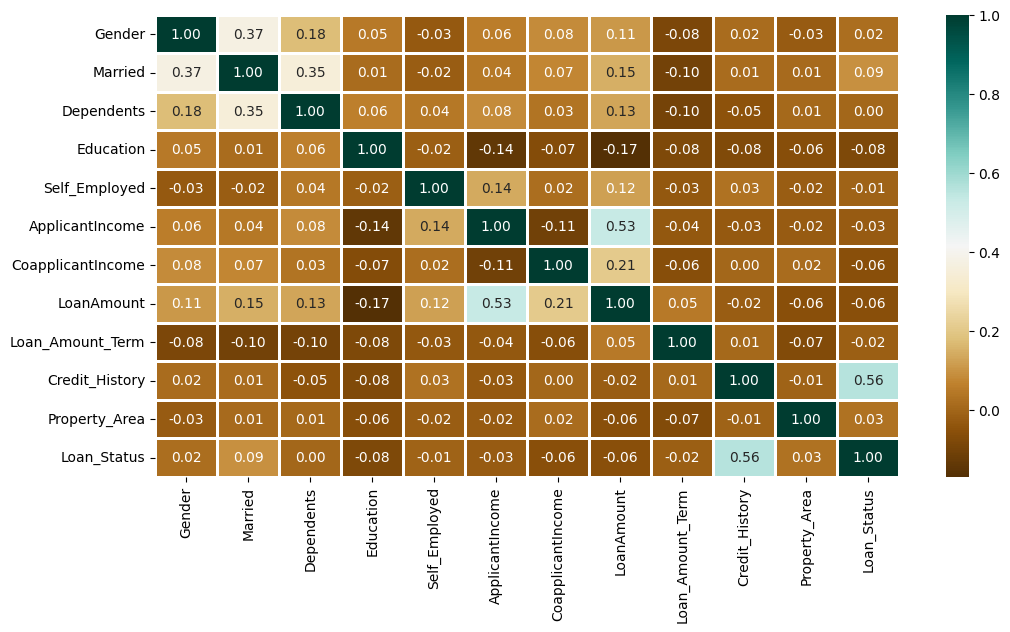

In [200]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

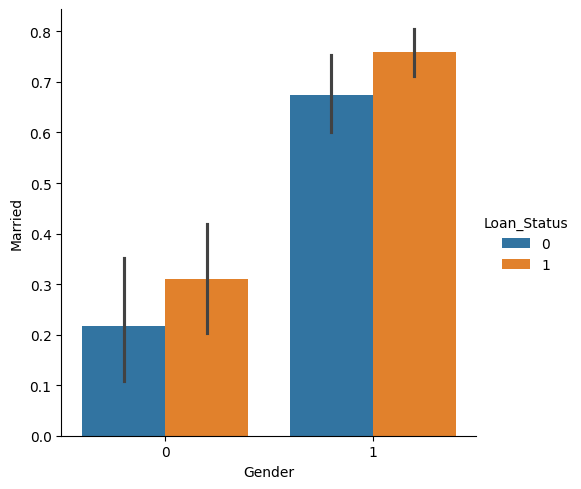

In [201]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data)

Now we will find out if there is any missing values in the dataset using below code.

In [202]:
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [203]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

In [204]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As there is no missing value then we must proceed to model training.

In [205]:
# Feature engineering: Creating a new feature 'TotalIncome'
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Dropping less useful features
data = data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

### **Splitting Dataset**

In [206]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 10), (240, 10), (358,), (240,))

### **Model Training and Evaluation**
As this is a classification problem so we will be using these models :



*   KNeighborsClassifiers
*   RandomForestClassifiers
*   Logistics Regression
*   Support Vector Classifiers (SVC)

To predict the accuracy we will use the accuracy score function from scikit-learn library.


In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print(f"**{clf.__class__.__name__}**")
    print(f"  Accuracy: {100*accuracy_score(Y_train, Y_pred):.2f}%")
    print(f"  Precision: {100*precision_score(Y_train, Y_pred):.2f}%")
    print(f"  Recall: {100*recall_score(Y_train, Y_pred):.2f}%")
    print(f"  F1-score: {100*f1_score(Y_train, Y_pred):.2f}%")
    print("-" * 20)

**RandomForestClassifier**
  Accuracy: 98.04%
  Precision: 97.98%
  Recall: 99.18%
  F1-score: 98.57%
--------------------
**KNeighborsClassifier**
  Accuracy: 77.09%
  Precision: 80.00%
  Recall: 88.52%
  F1-score: 84.05%
--------------------
**SVC**
  Accuracy: 68.44%
  Precision: 68.35%
  Recall: 100.00%
  F1-score: 81.20%
--------------------
**LogisticRegression**
  Accuracy: 79.33%
  Precision: 78.33%
  Recall: 96.31%
  F1-score: 86.40%
--------------------


In [208]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(f"**{clf.__class__.__name__}**")
    print(f"  Accuracy: {100*accuracy_score(Y_test, Y_pred):.2f}%")
    print(f"  Precision: {100*precision_score(Y_test, Y_pred):.2f}%")
    print(f"  Recall: {100*recall_score(Y_test, Y_pred):.2f}%")
    print(f"  F1-score: {100*f1_score(Y_test, Y_pred):.2f}%")
    print("-" * 20)

**RandomForestClassifier**
  Accuracy: 79.17%
  Precision: 82.68%
  Recall: 88.62%
  F1-score: 85.55%
--------------------
**KNeighborsClassifier**
  Accuracy: 63.75%
  Precision: 70.62%
  Recall: 82.04%
  F1-score: 75.90%
--------------------
**SVC**
  Accuracy: 69.58%
  Precision: 69.58%
  Recall: 100.00%
  F1-score: 82.06%
--------------------
**LogisticRegression**
  Accuracy: 80.42%
  Precision: 80.00%
  Recall: 95.81%
  F1-score: 87.19%
--------------------


### **Conclusion(Before scaling) :**
Based on the provided metrics, the LogisticRegression appears to be the best performing model overall.

Here's why:

*  **High Accuracy:** It boasts the highest accuracy (80.42%) among the models.
*  **Balanced Precision and Recall:** It achieves a good balance between precision (80.00%) and recall (95.81%), indicating its ability to minimize both false positives and false negatives.
*  **Strong F1-score:** Its F1-score (87.19%) further confirms its strong overall performance.

While SVC has a slightly higher recall, its lower precision and accuracy compared to RandomForestClassifier suggest that it might be overfitting and less generalizable.

### **Scaling the features**

In [209]:
# Scaling the features
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print(f"**{clf.__class__.__name__}**")
    print(f"  Accuracy: {100*accuracy_score(Y_train, Y_pred):.2f}%")
    print(f"  Precision: {100*precision_score(Y_train, Y_pred):.2f}%")
    print(f"  Recall: {100*recall_score(Y_train, Y_pred):.2f}%")
    print(f"  F1-score: {100*f1_score(Y_train, Y_pred):.2f}%")
    print("-" * 20)

**RandomForestClassifier**
  Accuracy: 98.04%
  Precision: 97.98%
  Recall: 99.18%
  F1-score: 98.57%
--------------------
**KNeighborsClassifier**
  Accuracy: 83.24%
  Precision: 82.86%
  Recall: 95.08%
  F1-score: 88.55%
--------------------
**SVC**
  Accuracy: 80.73%
  Precision: 78.50%
  Recall: 98.77%
  F1-score: 87.48%
--------------------
**LogisticRegression**
  Accuracy: 80.17%
  Precision: 78.36%
  Recall: 97.95%
  F1-score: 87.07%
--------------------


In [211]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(f"**{clf.__class__.__name__}**")
    print(f"  Accuracy: {100*accuracy_score(Y_test, Y_pred):.2f}%")
    print(f"  Precision: {100*precision_score(Y_test, Y_pred):.2f}%")
    print(f"  Recall: {100*recall_score(Y_test, Y_pred):.2f}%")
    print(f"  F1-score: {100*f1_score(Y_test, Y_pred):.2f}%")
    print("-" * 20)

**RandomForestClassifier**
  Accuracy: 79.17%
  Precision: 82.68%
  Recall: 88.62%
  F1-score: 85.55%
--------------------
**KNeighborsClassifier**
  Accuracy: 77.08%
  Precision: 80.11%
  Recall: 89.22%
  F1-score: 84.42%
--------------------
**SVC**
  Accuracy: 81.67%
  Precision: 80.00%
  Recall: 98.20%
  F1-score: 88.17%
--------------------
**LogisticRegression**
  Accuracy: 81.67%
  Precision: 80.30%
  Recall: 97.60%
  F1-score: 88.11%
--------------------


In [212]:
from sklearn.model_selection import cross_val_score

# Iterate through your models
for clf in (rfc, knn, svc, lc):
    # Perform 5-fold cross-validation
    scores = cross_val_score(clf, X, Y, cv=10)
    print(f"**{clf.__class__.__name__}**")
    print("Mean accuracy:", scores.mean())
    print("-" * 20)

**RandomForestClassifier**
Mean accuracy: 0.7508757062146892
--------------------
**KNeighborsClassifier**
Mean accuracy: 0.5903389830508474
--------------------
**SVC**
Mean accuracy: 0.6806214689265537
--------------------
**LogisticRegression**
Mean accuracy: 0.8010169491525424
--------------------


### **Conclusion :**
Based on the cross-validation scores , the LogisticRegression model appears to be the best performing one with a mean accuracy of 0.801